In [5]:
# Importações
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io

In [6]:
# Funções de Processamento de Imagem

def converter_para_tons_de_cinza(img_colorida):
    """
    Converte uma imagem colorida para tons de cinza.
    Recebe um objeto Image da PIL e retorna outro.
    """
    largura, altura = img_colorida.size
    img_cinza = Image.new("L", (largura, altura))

    for x in range(largura):
        for y in range(altura):
            # Lida com imagens que podem ter um canal alfa (RGBA)
            pixel = img_colorida.getpixel((x, y))
            if isinstance(pixel, int): # Se a imagem já for grayscale
                r, g, b = pixel, pixel, pixel
            elif len(pixel) == 4: # RGBA
                r, g, b, a = pixel
            else: # RGB
                r, g, b = pixel

            valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            img_cinza.putpixel((x, y), valor_cinza)

    return img_cinza

def binarizar_imagem(imagem_cinza, limiar=127):
    """
    Converte uma imagem em tons de cinza para preto e branco (binarizada).
    Recebe um objeto Image da PIL e retorna outro.
    """
    largura, altura = imagem_cinza.size
    img_binaria = Image.new("1", (largura, altura))

    for x in range(largura):
        for y in range(altura):
            valor_pixel = imagem_cinza.getpixel((x, y))
            if valor_pixel > limiar:
                img_binaria.putpixel((x, y), 255)  # Branco
            else:
                img_binaria.putpixel((x, y), 0)    # Preto

    return img_binaria

Por favor, selecione o arquivo de imagem para fazer o upload:


Saving 10.jpg to 10.jpg


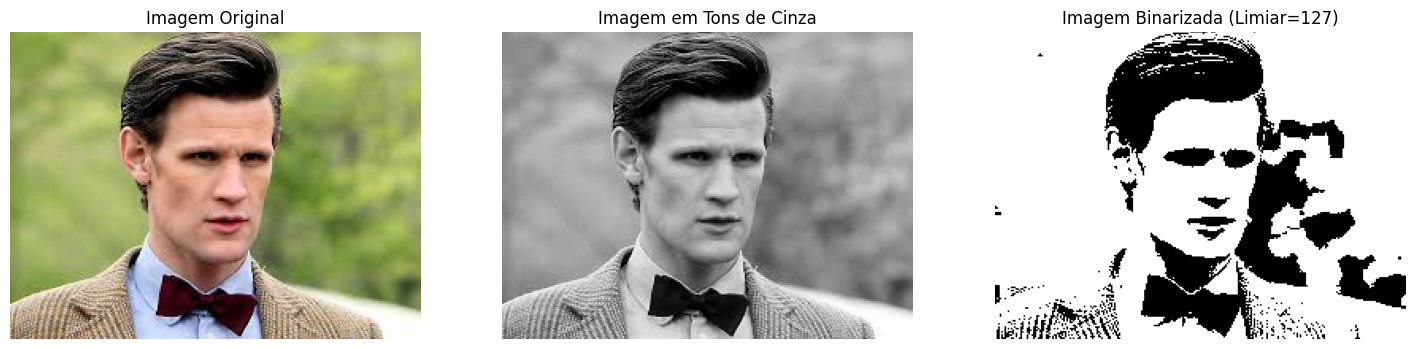


Arquivos processados prontos para download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Execução Principal

# Faz o upload da imagem para o ambiente do Colab
print("Por favor, selecione o arquivo de imagem para fazer o upload:")
uploaded = files.upload()

# Pega o nome do arquivo e os dados da primeira imagem que foi enviada
if len(uploaded.keys()) > 0:
    nome_arquivo = list(uploaded.keys())[0]
    dados_imagem = uploaded[nome_arquivo]

    # Abre a imagem original
    img_original = Image.open(io.BytesIO(dados_imagem))

    # Converte para RGB para garantir consistência, caso seja PNG com canal alfa (RGBA)
    if img_original.mode == 'RGBA':
        img_original = img_original.convert('RGB')

    # Processa a imagem
    img_cinza = converter_para_tons_de_cinza(img_original)
    img_binaria = binarizar_imagem(img_cinza, limiar=127)

    # Exibe as imagens usando Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].imshow(img_original)
    axs[0].set_title('Imagem Original')
    axs[0].axis('off') # Remove os eixos x e y

    axs[1].imshow(img_cinza, cmap='gray')
    axs[1].set_title('Imagem em Tons de Cinza')
    axs[1].axis('off')

    axs[2].imshow(img_binaria, cmap='gray')
    axs[2].set_title('Imagem Binarizada (Limiar=127)')
    axs[2].axis('off')

    plt.show()


    # Salva a imagem em tons de cinza em memória
    img_cinza.save("imagem_cinza.jpg")
    # Salva a imagem binarizada
    img_binaria.save("imagem_binaria.png")

    # Oferece o download para sua máquina local
    print("\nArquivos processados prontos para download:")
    files.download("imagem_cinza.jpg")
    files.download("imagem_binaria.png")

else:
    print("Nenhum arquivo foi enviado.")